### `Working with Time Series in Pandas`


#### `01: Your first time series`

We have already imported `pandas` as `pd` for you.

- Use `pd.date_range` to create seven dates starting from `'2017-1-1'` at (default) daily frequency. Use the arguments `start` and `periods`. Assign the result to `seven_days`.
  
- Iterate over each date in `seven_days` and in each iteration, print the `.dayofweek` and `.day_name()` attributes.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt 

In [58]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


#### `02: Create a time series of air quality data`
We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` for you, and loaded the air quality `DataFrame` into the variable `data`.

Inspect `data` using `.info()`.
Use `pd.to_datetime` to convert the `column` `'date'` to `dtype` `datetime64`.
Set the `'date'` `column` as `index`.
Validate the changes by inspecting `data` using `.info()` again.
Plot `data` using `subplots=True`.

In [59]:
data = pd.read_csv('datasets/nyc.csv')
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [60]:
data = pd.read_csv('datasets/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


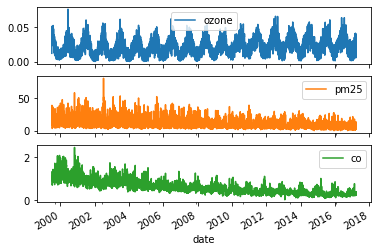

In [61]:
# Plot data
data.plot(subplots=True)
plt.show()

#### `03: Compare annual stock price trends`

We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` and we have already loaded the `'yahoo.csv'` file in a variable `yahoo` with `DateTimeIndex` and a single column `price`.

- Create an empty `pd.DataFrame()` called `prices`.
- Iterate over a list containing the three years, 2013, 2014, and 2015, as `string`, and in each loop:
    - Use the iteration variable to select the data for this year and the column `price`.
    - Use `.reset_index()` with `drop=True` to remove the `DatetimeIndex`.
    - Rename the column `price` column to the appropriate `year`.
    - Use `pd.concat()` to combine the yearly data with the data in `prices` along axis=1.
- Plot `prices`.


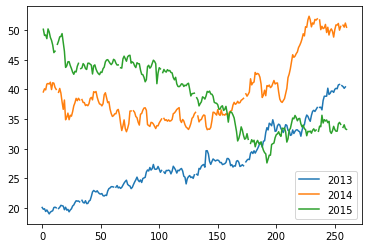

In [62]:
# Create dataframe prices here
yahoo = pd.read_csv('datasets/yahoo.csv')
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace =True)
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ["2013", "2014", "2015"]:
    price_per_year = yahoo.loc[year, ["price"]].reset_index(drop=True)
    price_per_year.rename(columns={'price' : year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()


#### `04: Set and change time series frequency`
We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the co_cities.csv file in a variable co.

- Inspect `co` using `.info()`.
- Use `.asfreq()` to set the frequency to calendar daily.
- Show a plot of `'co'` using `subplots=True`.
- Change the the frequency to monthly using the alias `'M'`.
- Show another plot of `co` using `subplots=True`.

In [63]:
co = pd.read_csv("datasets/co_cities.csv")
co.date =  pd.to_datetime(co.date)
co.set_index('date', inplace =True)
co

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761
...,...,...,...
2010-12-27,0.510417,0.669384,0.414583
2010-12-28,0.479166,0.669129,0.425278
2010-12-29,0.460417,0.291757,0.400924


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


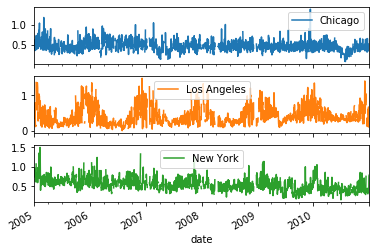

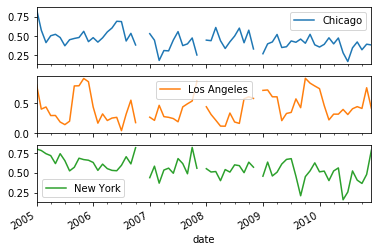

In [64]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()


# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()



#### `05: Shifting stock prices across time`
We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` and we have already loaded the 'yahoo.csv' file in a variable `yahoo` with `DateTimeIndex` and a single column `price`.

- Create an empty `pd.DataFrame()` called `prices`.
- Iterate over a list containing the three years, 2013, 2014, and 2015, as `string`, and in each loop:
    - Use the iteration variable to select the data for this year and the column `price`.
    - Use `.reset_index()` with `drop=True` to remove the `DatetimeIndex`.
    - Rename the column `price` column to the appropriate `year`.
    - Use `pd.concat()` to combine the yearly data with the data in `prices` along `axis=1`.
- Plot `prices`.

In [65]:
# Import data here
google = pd.read_csv('datasets/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')
google

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


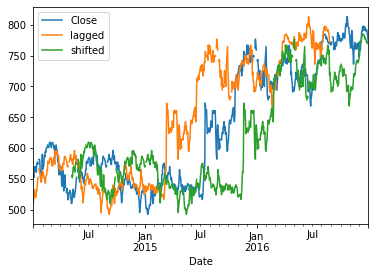

In [66]:
# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()

#### `06: Calculating stock price changes`

We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt`. We have also loaded Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, and assigned the result to `yahoo`.

- Create a new column called `shifted_30` that contains the `'price'` shifted by 30 business days into the future.
- Subtract `'shifted_30'` from `'price'`, and assign the result to a new column, `'change_30'`.
- Apply `.diff()`, setting `periods` to 30, and assign the result to a new column, `'diff_30'`.
- Inspect the last five rows of `yahoo` to verify the calculation.
- Subtract `diff_30` from `change_30` using the `.sub()` method and print the `.value_counts()` of the result to show both columns are equal.

In [67]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['change_30'].sub(yahoo['diff_30']).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


#### `07: Plotting multi-period returns`
 We have already imported `pandas` as `pd`, and `matplotlib.pyplot` as `plt`. We have also loaded `'GOOG'` stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to `google`.

- Create the columns `'daily_return'`, `'monthly_return'`, and `'annual_return'` that contain the `pct_change()` of `'Close'` for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
- Plot the result using `subplots=True`.

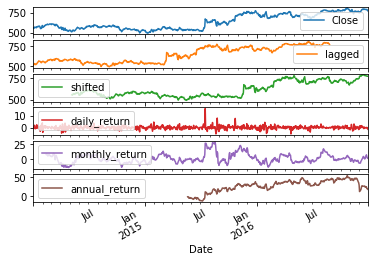

In [68]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()


In [71]:
google.tail(10)

,Close,lagged,shifted,daily_return,monthly_return,annual_return
Date,,,,,,
2016-12-19,794.20,NaN,782.44,0.429944,1.492614,25.821834
2016-12-20,796.42,NaN,777.14,0.279527,0.747619,26.566547
2016-12-21,794.56,NaN,779.91,-0.233545,1.177879,23.421044
2016-12-22,791.26,NaN,777.50,-0.415324,3.763638,23.118815
2016-12-23,789.91,NaN,775.42,-0.170614,4.759821,24.336534
2016-12-26,NaN,NaN,772.15,0.000000,7.313064,24.644565
2016-12-27,791.55,NaN,772.08,0.207619,4.358660,19.790248
2016-12-28,785.05,NaN,769.64,-0.821174,2.690718,19.026321
2016-12-29,782.79,NaN,769.41,-0.287880,1.498904,19.245944
